In [1]:
import pandas as pd

file_path = 'adult22.csv'
df = pd.read_csv(file_path)

selected_columns = ['STREV_A', 'FRJUICTP_A', 'COFFEENOTP_A', 'SALADTP_A', 'FRIESTP_A', 'BEANSTP_A', 'PIZZATP_A', 'OVEGTP_A']
df_selected = df[selected_columns]

df_selected = df_selected[~df_selected['STREV_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRJUICTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['COFFEENOTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['SALADTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['FRIESTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['BEANSTP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['PIZZATP_A'].isin([7, 8, 9])]
df_selected = df_selected[~df_selected['OVEGTP_A'].isin([7, 8, 9])]

df_selected['STREV_A'].replace({2: 0}, inplace=True)
df_selected.replace({
    'FRJUICTP_A': {1: 3, 3: 1},
    'COFFEENOTP_A': {1: 3, 3: 1},
    'SALADTP_A': {1: 3, 3: 1},
    'FRIESTP_A': {1: 3, 3: 1},
    'BEANSTP_A': {1: 3, 3: 1},
    'PIZZATP_A': {1: 3, 3: 1},
    'OVEGTP_A': {1: 3, 3: 1},
}, inplace=True)

X = df_selected.drop(columns=['STREV_A'])
y = df_selected['STREV_A']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

def plot_feature_importance(importance_df, title):
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance: {title}')
    plt.show()
    
    
def plot_kmeans_clusters(X_test, y_pred, title):
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clusters: {title}')
    plt.show()

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Descriptive Statistics

In [5]:
print(df_selected.describe())

            STREV_A    FRJUICTP_A  COFFEENOTP_A     SALADTP_A     FRIESTP_A  \
count  26318.000000  26318.000000  26318.000000  26318.000000  26318.000000   
mean       0.035983      1.000380      1.214302      1.758758      1.228893   
std        0.186251      1.077108      1.300433      0.865051      0.795099   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      1.000000   
50%        0.000000      1.000000      1.000000      2.000000      1.000000   
75%        0.000000      2.000000      3.000000      2.000000      2.000000   
max        1.000000      3.000000      3.000000      3.000000      3.000000   

          BEANSTP_A     PIZZATP_A      OVEGTP_A  
count  26318.000000  26318.000000  26318.000000  
mean       1.153545      1.045976      2.120830  
std        0.834674      0.651152      0.837066  
min        0.000000      0.000000      0.000000  
25%        1.000000      1.000000     

# Correlation Analysis

               STREV_A  FRJUICTP_A  COFFEENOTP_A  SALADTP_A  FRIESTP_A  \
STREV_A       1.000000    0.006182     -0.003600  -0.041873  -0.020466   
FRJUICTP_A    0.006182    1.000000      0.094862   0.058946   0.128126   
COFFEENOTP_A -0.003600    0.094862      1.000000   0.063151   0.077139   
SALADTP_A    -0.041873    0.058946      0.063151   1.000000   0.024653   
FRIESTP_A    -0.020466    0.128126      0.077139   0.024653   1.000000   
BEANSTP_A    -0.009632    0.120646      0.085663   0.139032   0.134785   
PIZZATP_A    -0.037140    0.071761      0.048046   0.019287   0.319780   
OVEGTP_A     -0.018627    0.054063      0.051367   0.375947   0.017192   

              BEANSTP_A  PIZZATP_A  OVEGTP_A  
STREV_A       -0.009632  -0.037140 -0.018627  
FRJUICTP_A     0.120646   0.071761  0.054063  
COFFEENOTP_A   0.085663   0.048046  0.051367  
SALADTP_A      0.139032   0.019287  0.375947  
FRIESTP_A      0.134785   0.319780  0.017192  
BEANSTP_A      1.000000   0.094119  0.138778  
PIZZ

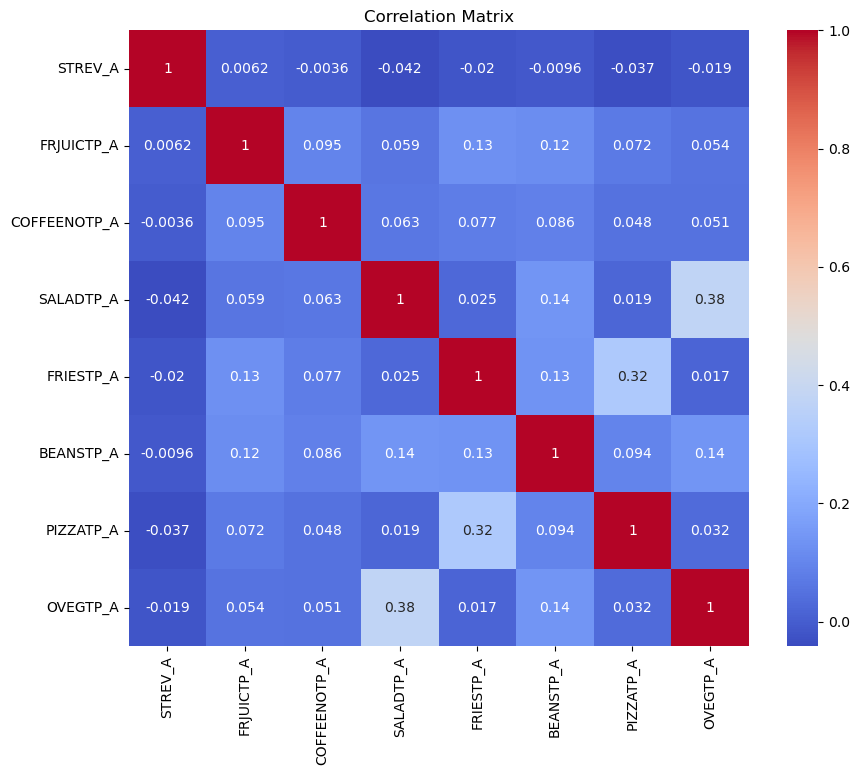

In [6]:
correlation_matrix = df_selected.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Hypothesis Testing

In [7]:
from scipy.stats import ttest_ind

heart_disease = df_selected[df_selected['STREV_A'] == 1]['FRJUICTP_A']
no_heart_disease = df_selected[df_selected['STREV_A'] == 0]['FRJUICTP_A']

t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 1.0029417566676073, P-value: 0.3158981856088808


# KNN

KNN
accuracy: 0.9631458966565349
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5081
           1       0.00      0.00      0.00       183

    accuracy                           0.96      5264
   macro avg       0.48      0.50      0.49      5264
weighted avg       0.93      0.96      0.95      5264



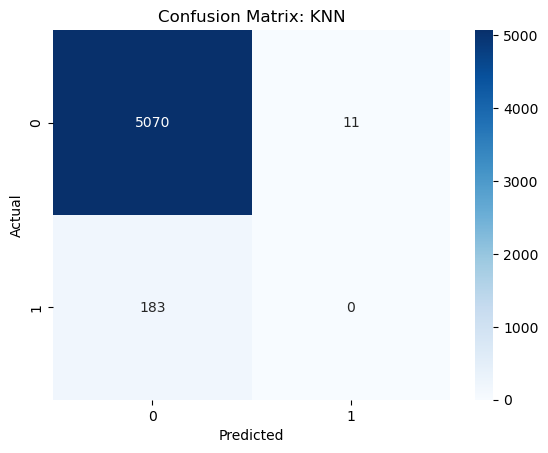

In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'KNN')

# K-means

K-means
accuracy: 0.5811170212765957
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      5081
           1       0.03      0.42      0.06       183

    accuracy                           0.58      5264
   macro avg       0.50      0.50      0.40      5264
weighted avg       0.93      0.58      0.71      5264



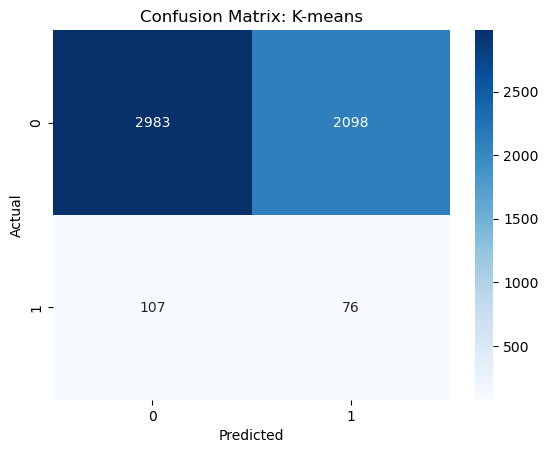

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_train)
y_pred = kmeans.predict(X_test)
print("K-means")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

plot_confusion_matrix(y_test, y_pred, 'K-means')

# Decision Tree

Decision Tree
accuracy: 0.9587765957446809
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5081
           1       0.05      0.01      0.02       183

    accuracy                           0.96      5264
   macro avg       0.51      0.50      0.50      5264
weighted avg       0.93      0.96      0.95      5264



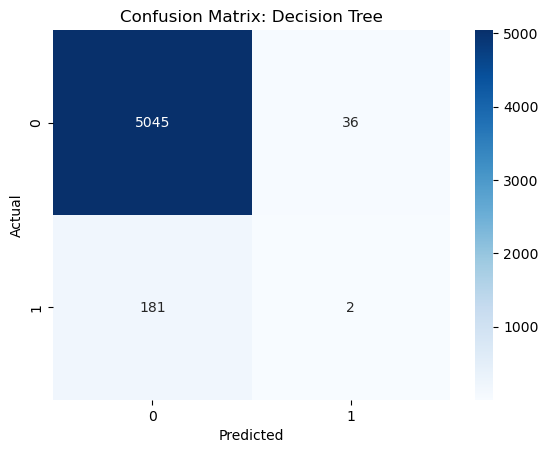

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

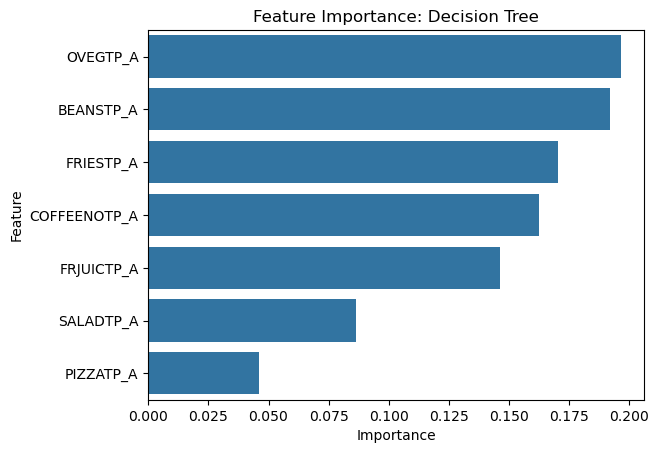

In [11]:
dt_importances = dt.feature_importances_
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importances})
plot_feature_importance(dt_importance_df, 'Decision Tree')

# Random Forest

Random Forest
accuracy: 0.9610562310030395
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5081
           1       0.00      0.00      0.00       183

    accuracy                           0.96      5264
   macro avg       0.48      0.50      0.49      5264
weighted avg       0.93      0.96      0.95      5264



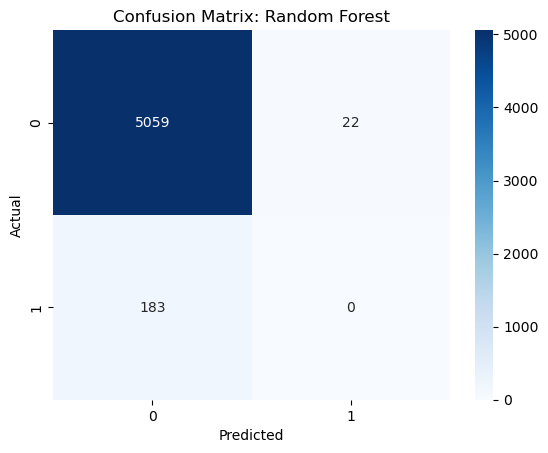

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'Random Forest')

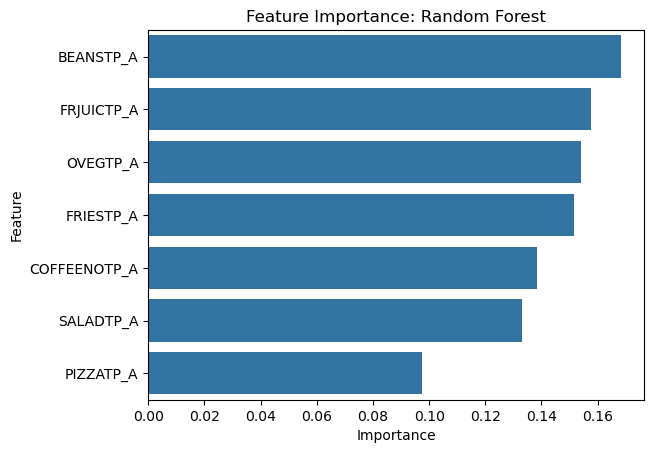

In [13]:
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
plot_feature_importance(rf_importance_df, 'Random Forest')

# CatBoost

CatBoost
accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5081
           1       0.00      0.00      0.00       183

    accuracy                           0.96      5264
   macro avg       0.48      0.50      0.49      5264
weighted avg       0.93      0.96      0.95      5264



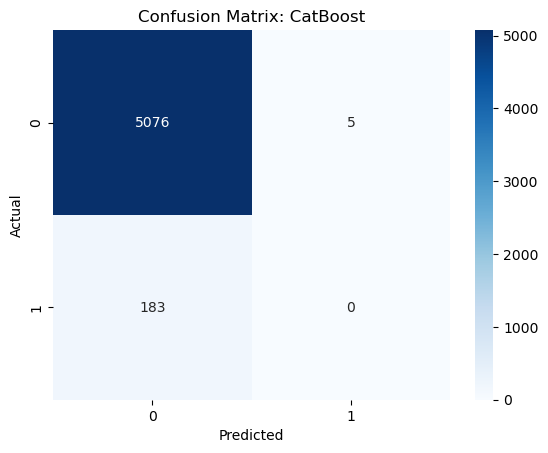

In [14]:
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
print("CatBoost")
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))
plot_confusion_matrix(y_test, y_pred, 'CatBoost')

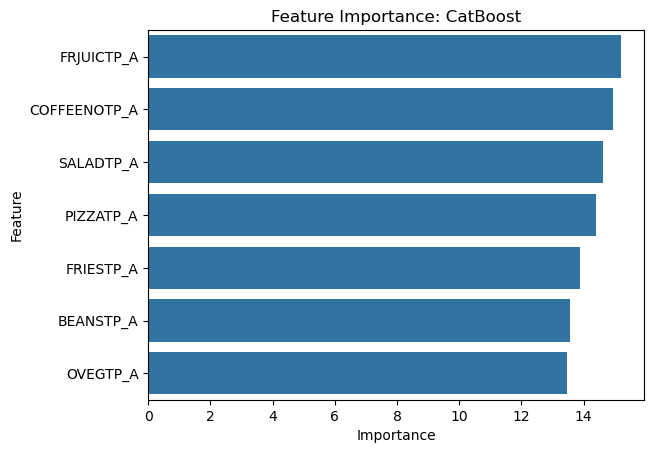

In [15]:
catboost_importances = catboost.get_feature_importance()
catboost_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': catboost_importances})
plot_feature_importance(catboost_importance_df, 'CatBoost')

# Logistic Regression

        Feature  Coefficient Correlation
0    FRJUICTP_A     0.044239    Positive
1  COFFEENOTP_A    -0.004574    Negative
6      OVEGTP_A    -0.024074    Negative
4     BEANSTP_A    -0.030378    Negative
3     FRIESTP_A    -0.046252    Negative
2     SALADTP_A    -0.228873    Negative
5     PIZZATP_A    -0.322015    Negative


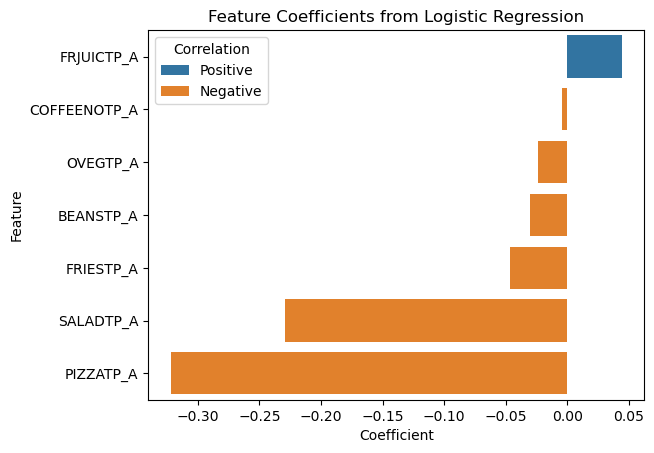

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df['Correlation'] = coef_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df.sort_values(by='Coefficient', ascending=False))
sns.barplot(x='Coefficient', y='Feature', hue='Correlation', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.show()